In [1]:
# 来自第一章
import numpy as np
import sounddevice as sd
%matplotlib notebook
import matplotlib.pyplot as plt


fs = 8000
A_freq = 440

blank = np.zeros(int(0.05 * fs))

def create_sound(f, duration):    
    t = np.linspace(0, duration, int(fs * duration))
    
    note = np.cos(2 * np.pi * f * t)  # base note
    for i in range(2, 6):
        note += 0.3 / i * np.cos(i * 2 * np.pi * f * t)
    note = np.append(note, blank)
    return note

def create_chord(chords, duration, freq_dict):
    sound = np.zeros(int(duration*fs))
    for note in chords:
        sound += create_sound(freq_dict[note], duration)
    return sound

In [2]:
# 来自第二章
freq_dict = {}
k = 2.0**(1.0/12.0)
fa = 440
f0 = fa / (k ** 9)

notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#",  "B", "C^"]

for i, note in enumerate(notes, start=0):
    freq_dict[note] = (k**i) * f0

In [3]:
# 一闪一闪亮晶晶
sheet = [("C", 0.5), ("C", 0.5), ("G", 0.5), ("G", 0.5), ("A", 0.5), ("A", 0.5), ("G", 0.5)]

music = np.array([])
for note, duration in sheet:
    music = np.append(music, create_sound(freq_dict[note], duration))

sd.play(music, fs)
    

<span style="color:red"> 写一首属于你的乐谱，要求5个音符以上，20个以下 </span>

In [4]:
def play_music_sheet(sheet):
    music = np.array([])
    for note, duration in sheet:
        music = np.append(music, create_sound(freq_dict[note], duration))
    sd.play(music, fs)
    return music
your_music_sheet = []
your_music = play_music_sheet(your_music_sheet)


# 来自大脑的声音

脑电波是一些自发的有节律的神经电活动，其频率变动范围在每秒1－30次之间的。
可划分为四个波段，即δ（0.5－3Hz）、θ（4－7Hz）、α（8－13Hz）、β（14－30Hz）。
除此之外，在觉醒并专注于某一事时，常可见一种频率较β波更高的γ波，其频率为32~80Hz

下面是一组真实的睡眠实验数据
<img src="./img/sleep_eeg.png" />

In [5]:
# 加载 EEG 数据
import pickle

# open a file, where you stored the pickled data
eeg_file = open('./res/meditation_focus.pickle', 'rb')

# dump information to that file
eeg_data = pickle.load(eeg_file)

print(eeg_data)

       meditation      focus
0       25.076230  -9.866714
1       27.713776  -8.535703
2       19.957860  -9.550095
3       17.336845  -1.166344
4       12.706757  -9.102503
...           ...        ...
28634   -2.487818  42.711576
28635    0.229518  53.054174
28636   -8.368492  60.599009
28637  -15.379270  61.663946
28638  -17.814318  86.820920

[28639 rows x 2 columns]


<IPython.core.display.Javascript object>


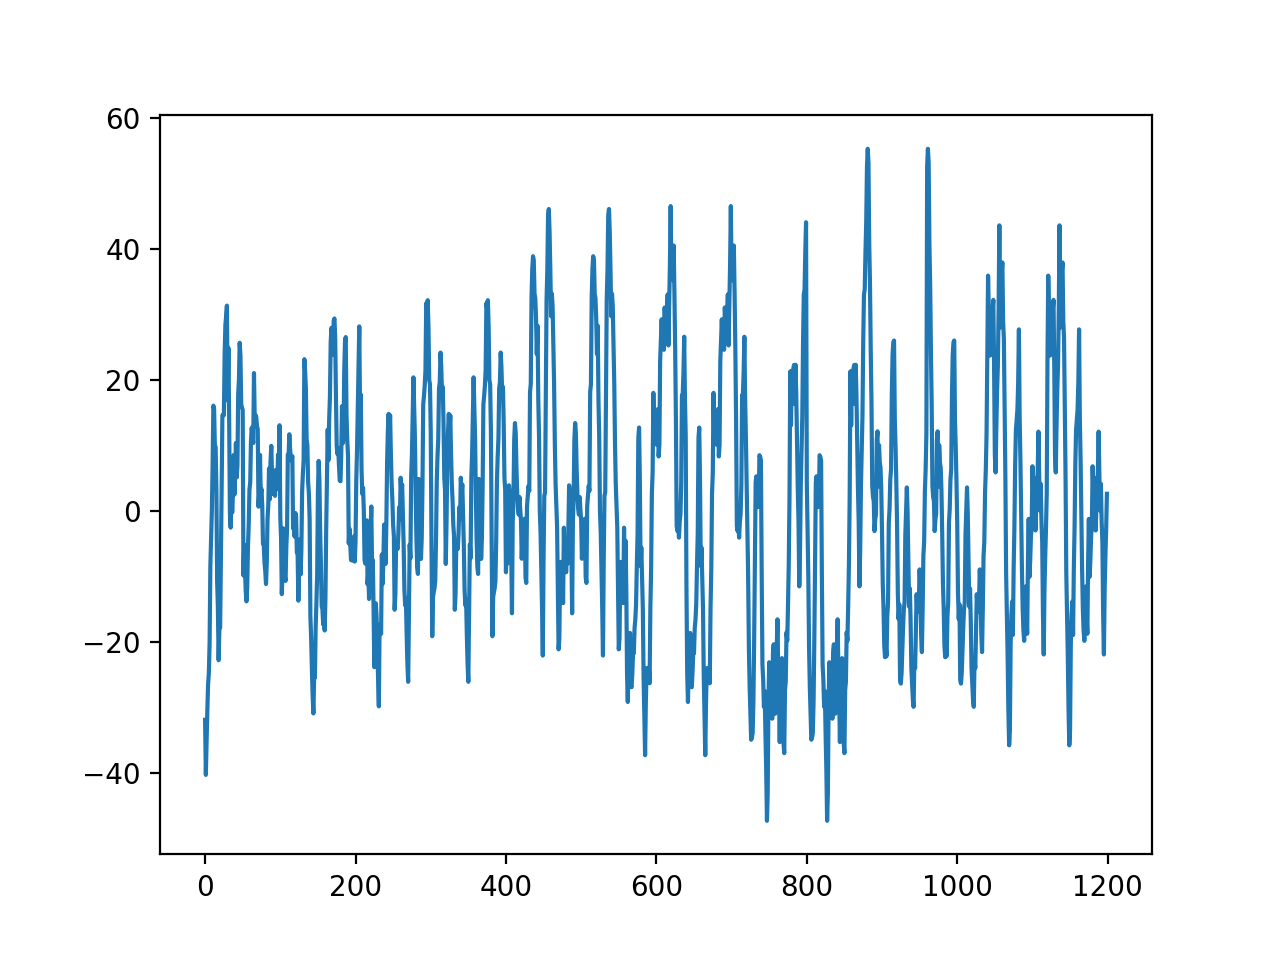

In [6]:
# 播放冥想的声音
meditation = np.array(eeg_data["meditation"])

normal_denom = np.max(np.abs(meditation))

plt.plot(meditation[960:2160])

meditation /= normal_denom

sd.play(meditation, fs)



In [7]:
# 播放专注的声音
focus = np.array(eeg_data["focus"])

plt.plot(focus[960:2160])

focus /= normal_denom

sd.play(focus, fs)


In [ ]:
# 保存你的歌曲
from scipy.io import wavfile

def write_wav(filename_no_ext, fs, sound):
    wavfile.write(filename_no_ext + '.wav', fs, sound)
write_wave("属于你的歌", fs, your_music)

# 总结

# 课后问题
你喜欢的音乐是什么类型，他们在音色/音律上有哪些特点。
你觉得是什么赋予了音乐情感。